## Data pre-processing and data augmentation


In order to make the most of our few training examples, we will **"augment"** them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent **overfitting** and helps the model generalize better

In [340]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1 

)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2         # Set aside 20% of the data for validation
)

In [30]:
train_dir='./Data/cropped_image_output/train'
valid_dir='./Data/cropped_image_output/val'

**flow_from_directory** allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

In [37]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (255, 255),          # Resizes all images to 255*255 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "rgb",        # Converts the images to rgb
    class_mode = "categorical",      # Classifies the images into  categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = valid_dir,            # Directory containing the validation data
    target_size = (255, 255),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "rgb",        # Converts the images to rgb
    class_mode = "categorical",      # Classifies the images into  categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 4689 images belonging to 18 classes.
Found 260 images belonging to 18 classes.


## Creating architecture

Let’s create the architecture for our CNN model. The architecture is simple. It has three Convolutional layers and two fully connected layers.

**Figure 1.CNN Architecture**

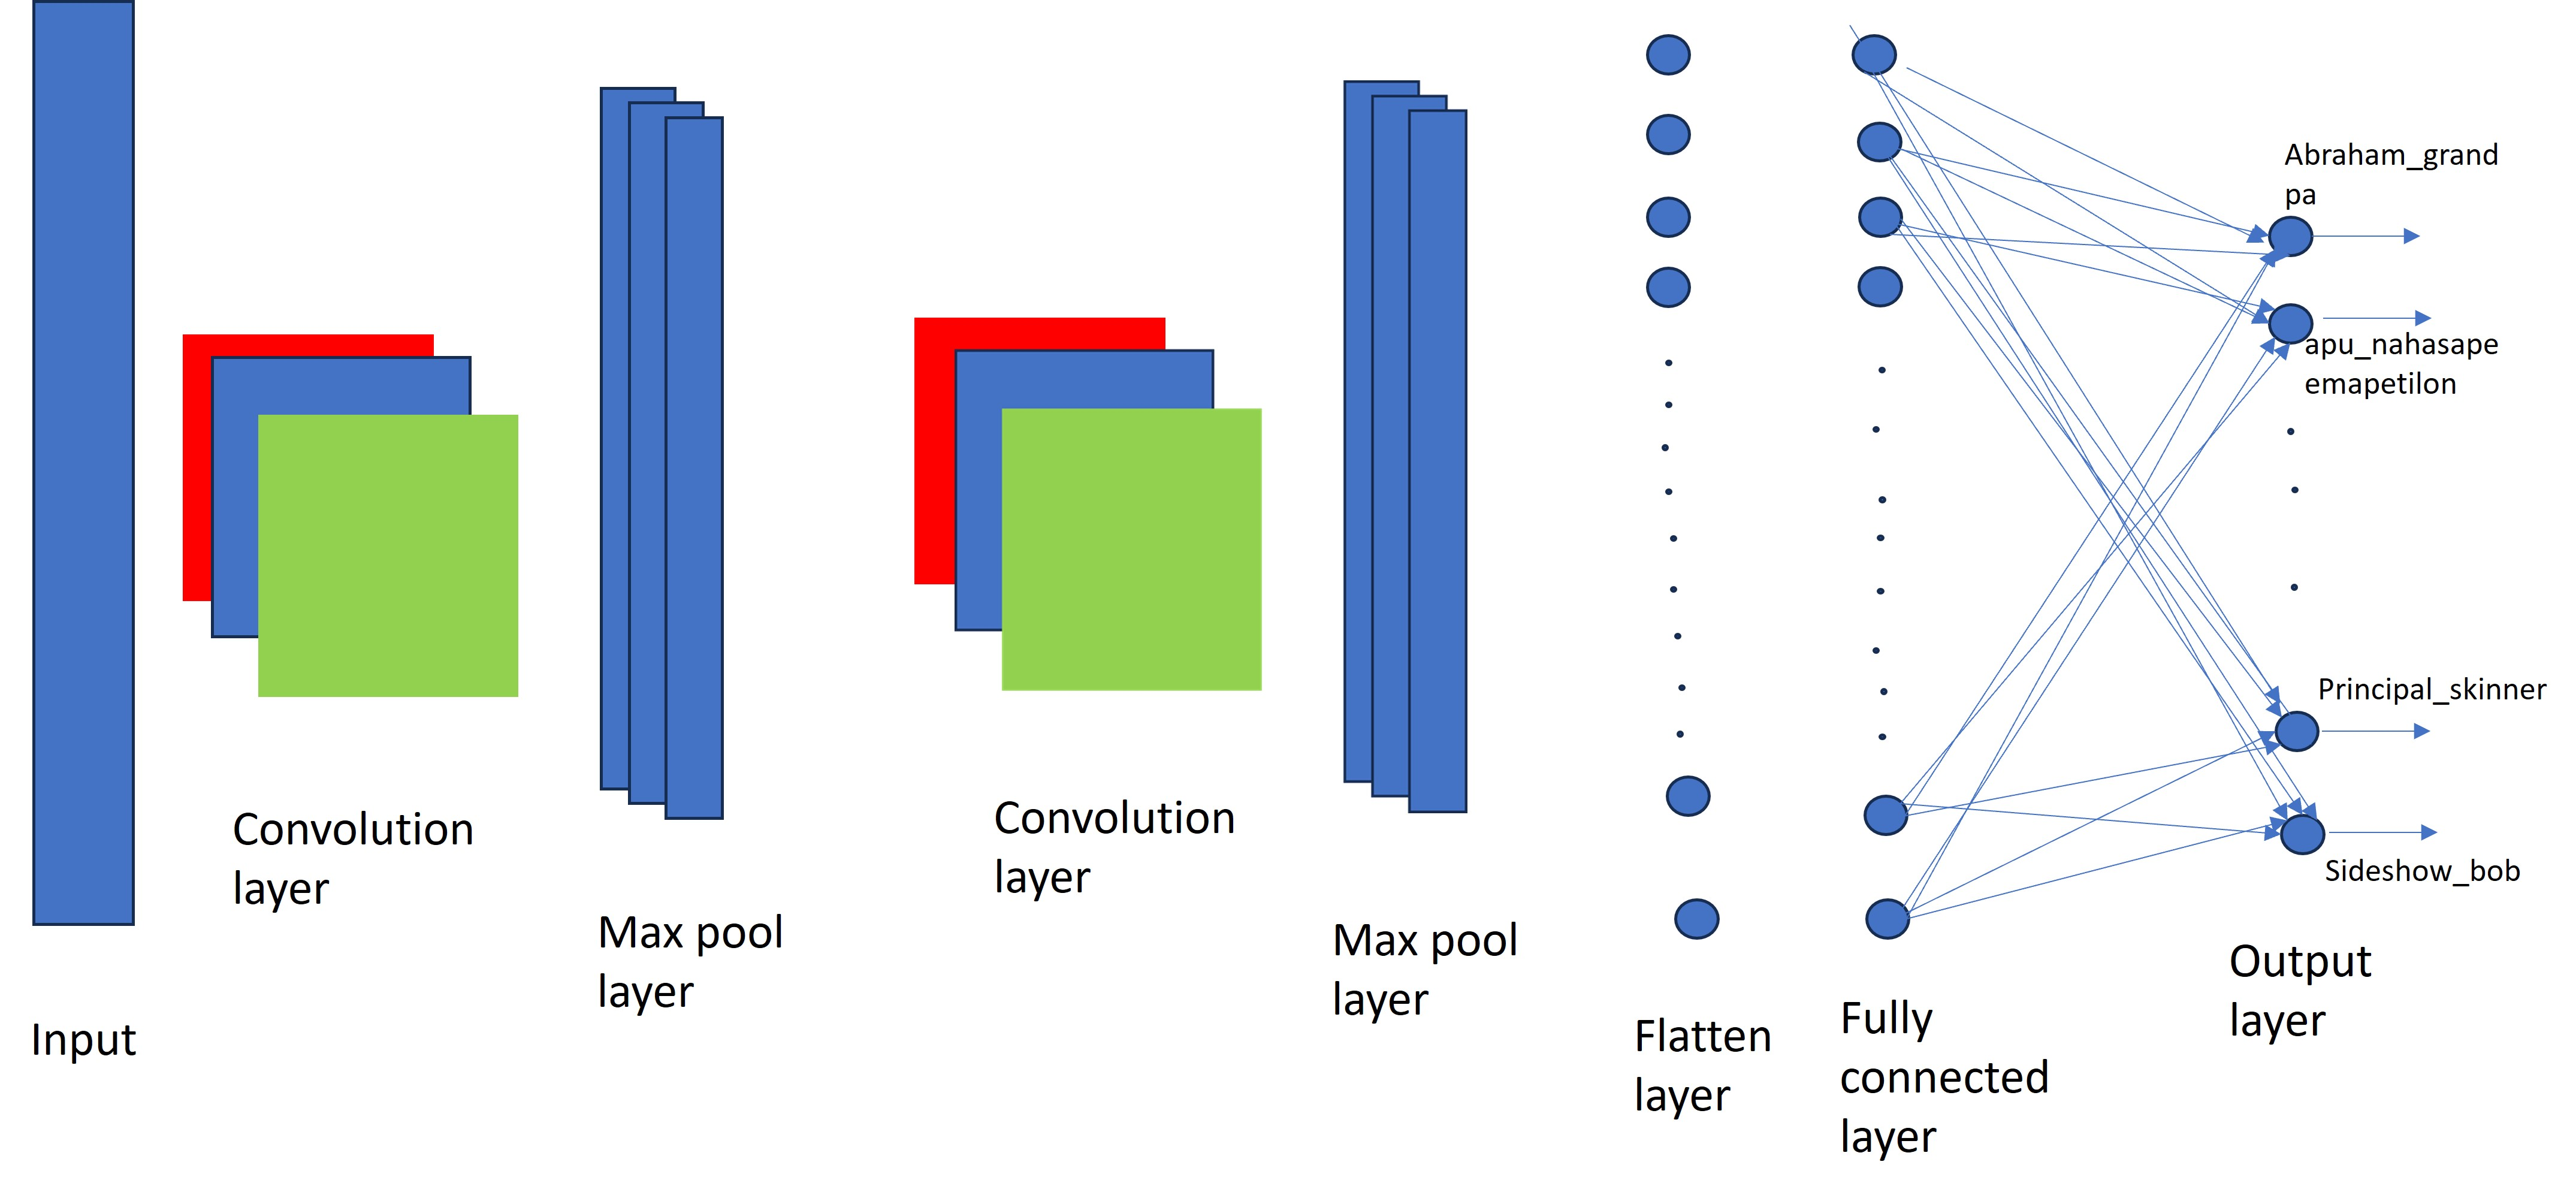



In [32]:
#import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

model = Sequential()

#input layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(255,255,3)))
#pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#hidden layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#1D transform
model.add(Flatten())

#Feed Forward Layer
model.add(Dense(256, activation='relu'))
#18 classes
model.add(Dense(18, activation='softmax'))

 Looking at the model.summary(), you can see the model’s architecture.

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 230400)           

Now that we have created the architecture for our model, we can compile it and start training it.

In [34]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(train_generator,validation_data=validation_generator,epochs = 10,verbose = 1)

Epoch 1/10
74/74 [==============================] - 84s 1s/step - loss: 2.2102 - accuracy: 0.3421 - val_loss: 1.5962 - val_accuracy: 0.5538
Epoch 2/10
74/74 [==============================] - 80s 1s/step - loss: 1.5377 - accuracy: 0.5551 - val_loss: 1.2342 - val_accuracy: 0.6590
Epoch 3/10
74/74 [==============================] - 81s 1s/step - loss: 1.2718 - accuracy: 0.6306 - val_loss: 1.1366 - val_accuracy: 0.6751
Epoch 4/10
74/74 [==============================] - 81s 1s/step - loss: 1.1359 - accuracy: 0.6722 - val_loss: 1.0879 - val_accuracy: 0.7056
Epoch 5/10
74/74 [==============================] - 81s 1s/step - loss: 1.0583 - accuracy: 0.6982 - val_loss: 0.9922 - val_accuracy: 0.7231
Epoch 6/10
74/74 [==============================] - 80s 1s/step - loss: 0.9406 - accuracy: 0.7277 - val_loss: 0.9661 - val_accuracy: 0.7384
Epoch 7/10
74/74 [==============================] - 80s 1s/step - loss: 0.8998 - accuracy: 0.7439 - val_loss: 0.9574 - val_accuracy: 0.7437
Epoch 8/10
74/74 [==

## Saving the model

In [338]:
model.save("./saved_simpsons_annotation")

NameError: name 'model' is not defined

In [395]:
model=tf.keras.models.load_model("./saved_simpsons_annotation")

## Prediction

In [396]:
from tensorflow.keras.preprocessing import image
import matplotlib .pyplot as plt
import numpy as np

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(255, 255))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.0                                     # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [397]:
def load_and_predict_class(path):
    imageg= load_image(path)
    pred = model.predict(imageg,batch_size=1)
    #print(pred)

    classes = np.argmax(pred, axis = 1)
    return classes

In [398]:
test_path='./Data/cropped_image_output/test/'

In [399]:
dict={'abraham_grampa_simpson': 0,
 'apu_nahasapeemapetilon': 1,
 'bart_simpson': 2,
 'charles_montgomery_burns': 3,
 'chief_wiggum': 4,
 'comic_book_guy': 5,
 'edna_krabappel': 6,
 'homer_simpson': 7,
 'kent_brockman': 8,
 'krusty_the_clown': 9,
 'lisa_simpson': 10,
 'marge_simpson': 11,
 'milhouse_van_houten': 12,
 'moe_szyslak': 13,
 'ned_flanders': 14,
 'nelson_muntz': 15,
 'principal_skinner': 16,
 'sideshow_bob': 17}

In [400]:
import os
from pathlib import Path
import csv

def get_prediction_to_csv(path):
        filename='./test_report.csv'
        with open('file.csv', 'w') as file:
                w = csv.writer(file)
                w.writerow(['path', 'expected','predicted_class', 'actual'])
                
                pathlist = Path(path).rglob('*.jpg')

                for path in pathlist:
                        # because path is object not string
                        path_in_str = str(path)
                        parent=os.path.basename(os.path.dirname(path_in_str))
                        predicted_class=load_and_predict_class(path_in_str)
                        for key, value in dict.items():
                                if value==predicted_class:
                                        label=key                  
                        
                        
                        items=[path_in_str,parent,predicted_class,label]
                        #print(items)
                        w.writerow(items)

In [401]:
test_predictions=get_prediction_to_csv(test_path)

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


# Report analysis

In [402]:
import pandas as pd
df=pd.read_csv('./file.csv')

In [403]:
df.head(10)

,path,expected,predicted_class,actual
0,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson
1,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson
2,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson
3,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson
4,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson
5,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[7],homer_simpson
6,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson
7,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson
8,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson
9,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson


In [404]:
import numpy as np
df['results']=np.where(df['actual']!=df['expected'],'wrong_prediction','correct_prediction')
df.head(10)

,path,expected,predicted_class,actual,results
0,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson,correct_prediction
1,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson,correct_prediction
2,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson,correct_prediction
3,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson,correct_prediction
4,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson,correct_prediction
5,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[7],homer_simpson,wrong_prediction
6,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson,correct_prediction
7,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson,correct_prediction
8,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson,correct_prediction
9,Data/cropped_image_output/test/abraham_grampa_...,abraham_grampa_simpson,[0],abraham_grampa_simpson,correct_prediction


[Text(0, 0, 'abraham_grampa_simpson'),
 Text(1, 0, 'apu_nahasapeemapetilon'),
 Text(2, 0, 'bart_simpson'),
 Text(3, 0, 'charles_montgomery_burns'),
 Text(4, 0, 'chief_wiggum'),
 Text(5, 0, 'comic_book_guy'),
 Text(6, 0, 'edna_krabappel'),
 Text(7, 0, 'homer_simpson'),
 Text(8, 0, 'kent_brockman'),
 Text(9, 0, 'krusty_the_clown'),
 Text(10, 0, 'lisa_simpson'),
 Text(11, 0, 'marge_simpson'),
 Text(12, 0, 'milhouse_van_houten'),
 Text(13, 0, 'moe_szyslak'),
 Text(14, 0, 'ned_flanders'),
 Text(15, 0, 'nelson_muntz'),
 Text(16, 0, 'principal_skinner'),
 Text(17, 0, 'sideshow_bob')]

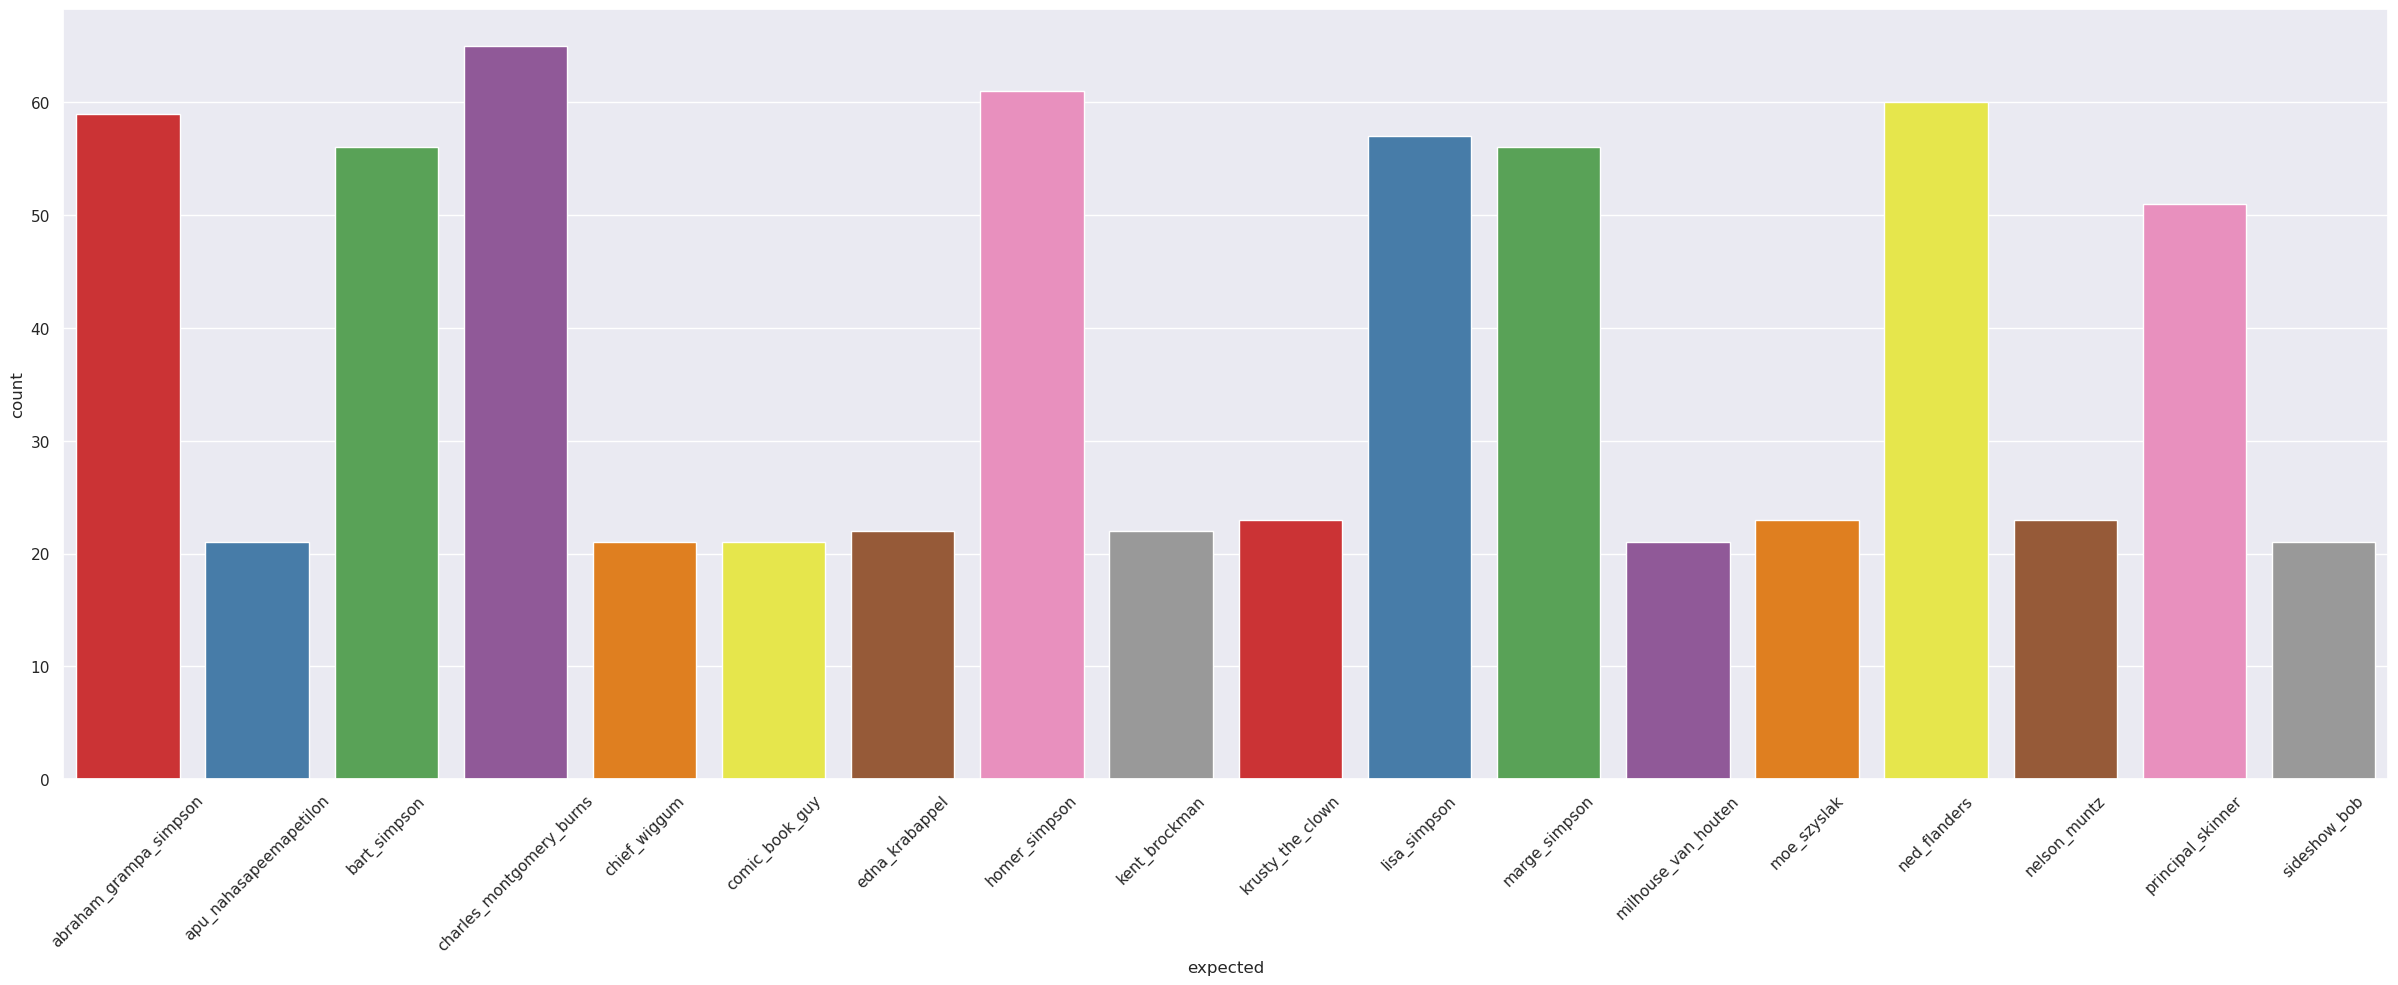

In [405]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,10)})
plot=sns.countplot(data=df,x='expected',palette='Set1')
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

**Correct vs wrong prediction by our model**

In [406]:
df_grouped=df.groupby(['expected', 'actual','results']).agg(predicted_class_count=('predicted_class', 'count')).reset_index()


In [407]:
df_grouped

,expected,actual,results,predicted_class_count
0,abraham_grampa_simpson,abraham_grampa_simpson,correct_prediction,53
1,abraham_grampa_simpson,apu_nahasapeemapetilon,wrong_prediction,1
2,abraham_grampa_simpson,bart_simpson,wrong_prediction,1
3,abraham_grampa_simpson,charles_montgomery_burns,wrong_prediction,2
4,abraham_grampa_simpson,homer_simpson,wrong_prediction,1
...,...,...,...,...
99,principal_skinner,marge_simpson,wrong_prediction,1
100,principal_skinner,nelson_muntz,wrong_prediction,1
101,principal_skinner,principal_skinner,correct_prediction,36
102,sideshow_bob,abraham_grampa_simpson,wrong_prediction,1


In [408]:
df1=df_grouped[['expected','actual','results','predicted_class_count']]

In [409]:
df1

,expected,actual,results,predicted_class_count
0,abraham_grampa_simpson,abraham_grampa_simpson,correct_prediction,53
1,abraham_grampa_simpson,apu_nahasapeemapetilon,wrong_prediction,1
2,abraham_grampa_simpson,bart_simpson,wrong_prediction,1
3,abraham_grampa_simpson,charles_montgomery_burns,wrong_prediction,2
4,abraham_grampa_simpson,homer_simpson,wrong_prediction,1
...,...,...,...,...
99,principal_skinner,marge_simpson,wrong_prediction,1
100,principal_skinner,nelson_muntz,wrong_prediction,1
101,principal_skinner,principal_skinner,correct_prediction,36
102,sideshow_bob,abraham_grampa_simpson,wrong_prediction,1


In [410]:
df1 = df1.groupby(['expected', 'results']).agg(predicted_class_count_sum=('predicted_class_count', 'sum')).reset_index()

In [411]:
df1

,expected,results,predicted_class_count_sum
0,abraham_grampa_simpson,correct_prediction,53
1,abraham_grampa_simpson,wrong_prediction,6
2,apu_nahasapeemapetilon,correct_prediction,19
3,apu_nahasapeemapetilon,wrong_prediction,2
4,bart_simpson,correct_prediction,35
5,bart_simpson,wrong_prediction,21
6,charles_montgomery_burns,correct_prediction,49
7,charles_montgomery_burns,wrong_prediction,16
8,chief_wiggum,correct_prediction,14
9,chief_wiggum,wrong_prediction,7


In [412]:
df_pivoted = df1.pivot_table(index=['expected'], columns='results',
                 values='predicted_class_count_sum', aggfunc='sum').reset_index()

In [413]:
df_pivoted.fillna(0,inplace=True)

In [414]:
df_pivoted

results,expected,correct_prediction,wrong_prediction
0,abraham_grampa_simpson,53.0,6.0
1,apu_nahasapeemapetilon,19.0,2.0
2,bart_simpson,35.0,21.0
3,charles_montgomery_burns,49.0,16.0
4,chief_wiggum,14.0,7.0
5,comic_book_guy,10.0,11.0
6,edna_krabappel,16.0,6.0
7,homer_simpson,48.0,13.0
8,kent_brockman,16.0,6.0
9,krusty_the_clown,19.0,4.0


**correct prediction vs wrong prediction**

<Axes: xlabel='expected'>

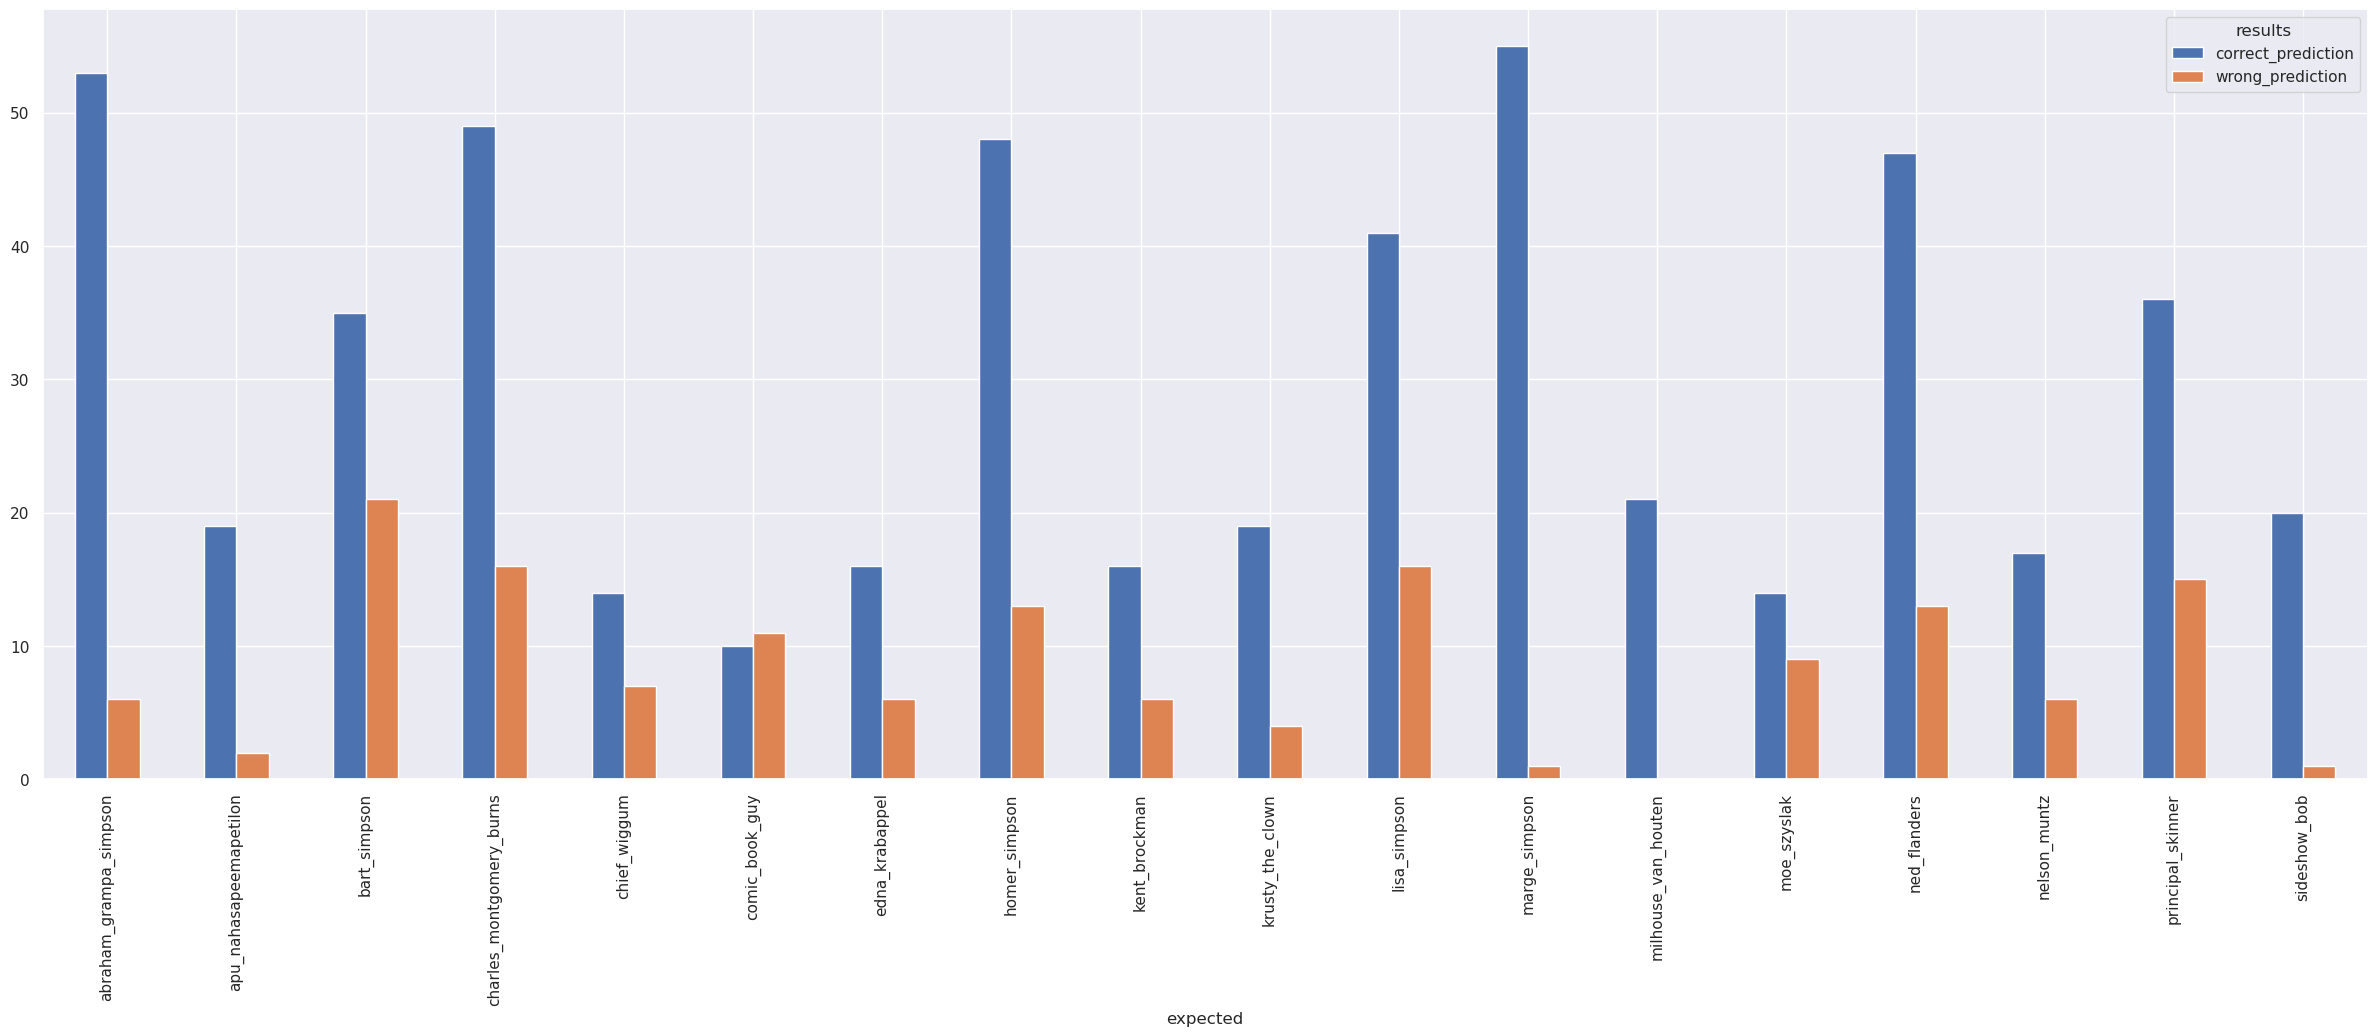

In [415]:
df_pivoted.plot(x='expected',y=['correct_prediction','wrong_prediction'],kind='bar')

**Analysing how each class is predicted**

In [416]:
import pandas as pd
df=pd.read_csv('./file.csv')

In [417]:
import numpy as np
df['results']=np.where(df['actual']!=df['expected'],'wrong_prediction','correct_prediction')

In [418]:
df_grouped=df.groupby(['expected', 'actual','results']).agg(predicted_class_count=('predicted_class', 'count')).reset_index()

In [419]:
df1=df_grouped[['expected','actual','results','predicted_class_count']]

In [420]:
df_pivot=pd.pivot_table(df1,index='expected',columns=['actual'],values='predicted_class_count')

In [421]:
df_pivot.fillna(0, inplace=True)

In [422]:
df_pivot

actual,abraham_grampa_simpson,apu_nahasapeemapetilon,bart_simpson,charles_montgomery_burns,chief_wiggum,comic_book_guy,edna_krabappel,homer_simpson,kent_brockman,krusty_the_clown,lisa_simpson,marge_simpson,milhouse_van_houten,moe_szyslak,ned_flanders,nelson_muntz,principal_skinner,sideshow_bob
expected,,,,,,,,,,,,,,,,,,
abraham_grampa_simpson,53.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
apu_nahasapeemapetilon,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
bart_simpson,2.0,0.0,35.0,6.0,1.0,0.0,0.0,3.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
charles_montgomery_burns,2.0,0.0,0.0,49.0,1.0,0.0,0.0,2.0,2.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
chief_wiggum,0.0,0.0,0.0,1.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
comic_book_guy,1.0,0.0,0.0,2.0,0.0,10.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
edna_krabappel,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0
homer_simpson,8.0,0.0,0.0,1.0,0.0,0.0,0.0,48.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
kent_brockman,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [423]:
#df_pivot.columns=df_pivot.columns.droplevel(0)

In [424]:
df_pivot.columns.name = None 

In [425]:
#df_pivot['sum']=df_pivot.sum(axis=1)

In [426]:
#df_pivot.reset_index(inplace=True)

In [427]:
df_pivot

,abraham_grampa_simpson,apu_nahasapeemapetilon,bart_simpson,charles_montgomery_burns,chief_wiggum,comic_book_guy,edna_krabappel,homer_simpson,kent_brockman,krusty_the_clown,lisa_simpson,marge_simpson,milhouse_van_houten,moe_szyslak,ned_flanders,nelson_muntz,principal_skinner,sideshow_bob
expected,,,,,,,,,,,,,,,,,,
abraham_grampa_simpson,53.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
apu_nahasapeemapetilon,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
bart_simpson,2.0,0.0,35.0,6.0,1.0,0.0,0.0,3.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
charles_montgomery_burns,2.0,0.0,0.0,49.0,1.0,0.0,0.0,2.0,2.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
chief_wiggum,0.0,0.0,0.0,1.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
comic_book_guy,1.0,0.0,0.0,2.0,0.0,10.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
edna_krabappel,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0
homer_simpson,8.0,0.0,0.0,1.0,0.0,0.0,0.0,48.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
kent_brockman,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [428]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, abraham_grampa_simpson to sideshow_bob
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   abraham_grampa_simpson    18 non-null     float64
 1   apu_nahasapeemapetilon    18 non-null     float64
 2   bart_simpson              18 non-null     float64
 3   charles_montgomery_burns  18 non-null     float64
 4   chief_wiggum              18 non-null     float64
 5   comic_book_guy            18 non-null     float64
 6   edna_krabappel            18 non-null     float64
 7   homer_simpson             18 non-null     float64
 8   kent_brockman             18 non-null     float64
 9   krusty_the_clown          18 non-null     float64
 10  lisa_simpson              18 non-null     float64
 11  marge_simpson             18 non-null     float64
 12  milhouse_van_houten       18 non-null     float64
 13  moe_szyslak               18 non-null    

<Axes: ylabel='expected'>

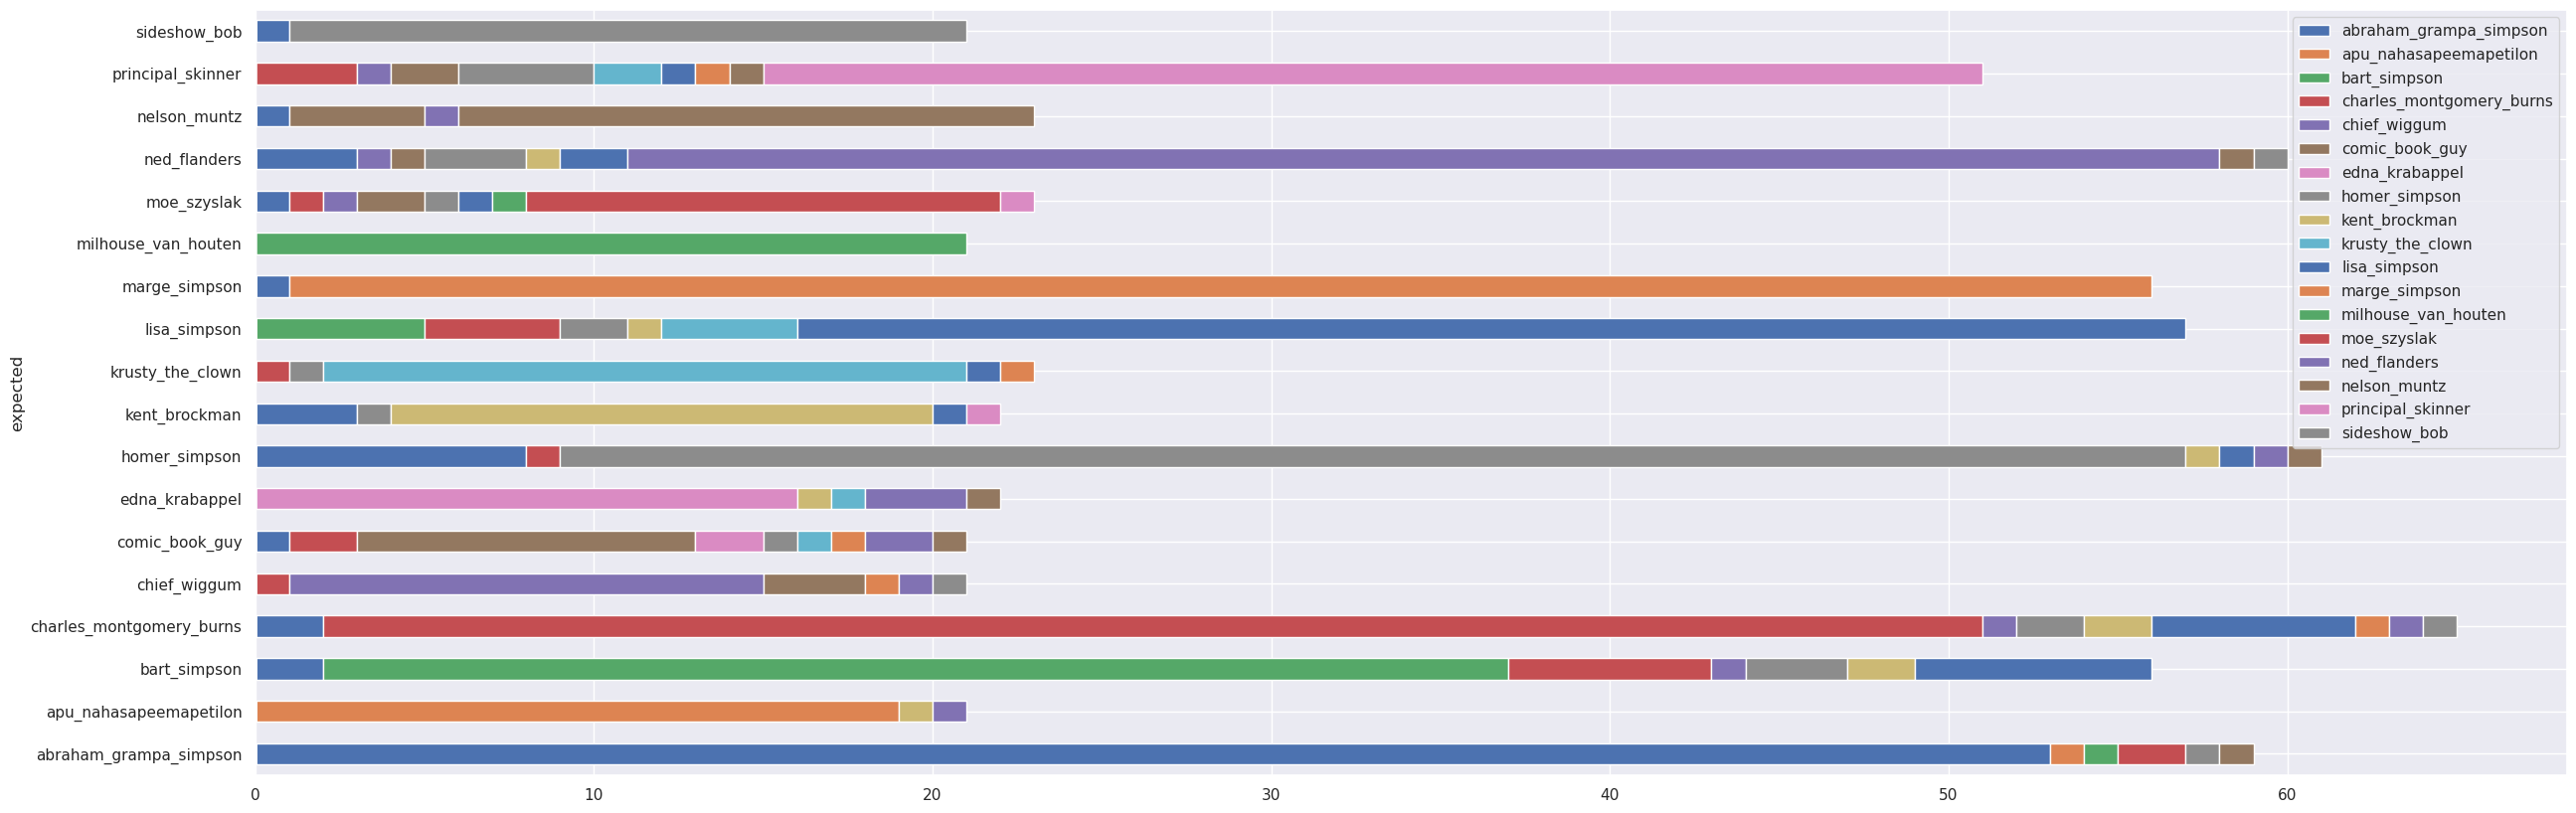

In [429]:

df_pivot.plot(kind='barh',stacked=True)
